In [37]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Symbols can be defined as follows:

In [22]:
x = smp.symbols('x')

You can then use various mathematical operators on the defined symbols

In [23]:
x**2

x**2

In [24]:
smp.sin(x) 

sin(x)

There are many many functions built into sympy

In [ ]:
smp. #press tab to autocomplete and see all functions

Can save expressions in new variables

In [14]:
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

Do operations on the new variables:

In [15]:
z = y**2
z

(x**2 + 4*x + 3)**2

Note that it doesn't expand. There are different methods you need to call to do different things with the expression:

In [16]:
z.factor()

(x + 1)**2*(x + 3)**2

In [17]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

Sympy expressions can be solved. In this case, we have a variable $z$. When we call solve on an expression, it solves $z=0$. In this case $z=z(x)$, so we solve for the value of $x$ that makes $z=0$:

In [19]:
smp.solve(z,x)

[-3, -1]

In [25]:
smp.solve(smp.sin(x), x)

[0, pi]

**Good Practice**: If you know that your variable $x$ is real (and in some cases non-negative) it's good to specify this when you define your variables to prevent complicated issues when solving complicated problems (especially with integrals).

In [31]:
x = smp.symbols('x')
smp.solve(x**2+1, x)

[-I, I]

In [32]:
x = smp.symbols('x', real=True)
smp.solve(x**2+1, x)

[]

Can define many variables at once

In [33]:
x, y, z = smp.symbols('x y z')
F = x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

Can also solve multivariable expressions, specifying which variable we want to solve for. In each case, $F=0$ is being solved for

In [38]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [39]:
y_sols = smp.solve(F,y)
y_sols

[-x**2/sin(z)]

In [40]:
z_sols = smp.solve(F,z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Finally, it may be the case that one has a sympy expression but wants to convert it into a numerical function so they can plot on a computer

In [43]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [45]:
expr_f = smp.lambdify([x,y], expr)

In [46]:
expr_f(1,2)

3.665191429188092

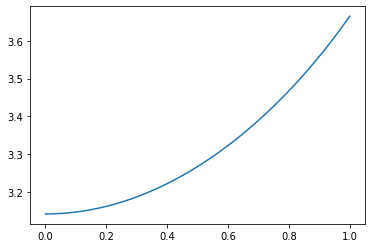

In [48]:
x = np.linspace(0,1,100)
y = 2
plt.plot(x, expr_f(x,y))
plt.show()

# Examples

# Calculus (1st year)

Watch my video here for a more in depth discussion: https://www.youtube.com/watch?v=-SdIZHPuW9o

## Limits

$$\lim_{x \to \pi} \sin(x/2+ \sin(x))$$

In [20]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

## Derivatives

$$ \frac{d}{dx} \left( \frac{1+\sin x}{1 - \cos x} \right)^2 $$

In [30]:
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$\frac{d}{dx} f(x+g(x)) $$

In [34]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)

In [36]:
smp.diff(f,x)

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

## Basic Antiderivatives

$$ \int \csc(x) \cot (x)  dx $$

In [37]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

## Definite Integrals

$$\int_{0}^{\ln(4)}\frac{e^x dt}{\sqrt{e^{2x}+9}} $$

In [57]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$\int_1^t x^{10} e^x dx $$

In [58]:
t= smp.symbols('t')

In [60]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

# Examples

* 
* Lea Catcheside

# Multivariable Calculus